<h2 id='part1'>A Look at the Data</h2>

In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper as h
%matplotlib inline

In [2]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Provide the number of rows and columns in this dataset.

In [3]:
df.shape

(51392, 154)

In [4]:
schema.shape

(154, 2)

In [5]:
schema.head(n=10)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


2. Which columns had no missing values? Provide a set of column names that have no missing values.

In [6]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

3. Which columns have the most missing values? Provide a set of column name that have more than 75% if their values missing.

In [7]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

4. Provide a pandas series of the different Professional status values in the dataset. Store this pandas series in status_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status.

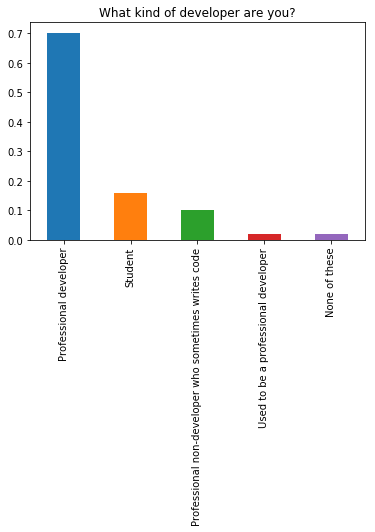

In [8]:
status_vals = df.Professional.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

5. Provide a pandas series of the different FormalEducation status values in the dataset. Store this pandas series in ed_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status.

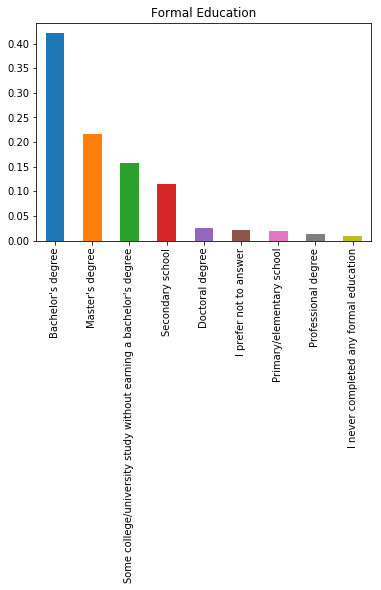

In [9]:
ed_vals = df.FormalEducation.value_counts()#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

6. Provide a pandas series of the different Country values in the dataset. Store this pandas series in count_vals. If you are correct, you should see a bar chart of the proportion of individuals in each country.

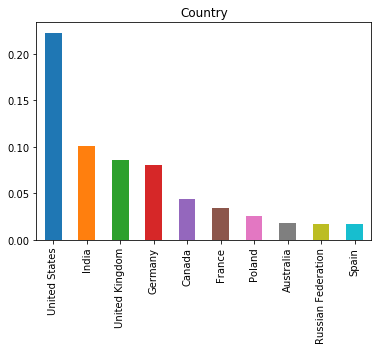

In [10]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

Feel free to explore the dataset further to gain additional familiarity with the columns and rows in the dataset.

In [11]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   60040.908291
       Doctoral degree                                     90623.768006
       I never completed any formal education                       NaN
       I prefer not to answer                              13255.786387
       Master's degree                                     56210.867588
       Primary/elementary school                           32258.064516
       Professional degree                                 45458.307618
       Secondary school                                    41110.162320
       Some college/university study without earning a...  48116.699754
Male   Bachelor's degree                                   57413.518034
       Doctoral degree                                     76872.602904
       I never completed any formal education              43090.588914
       I prefer not to answer                              37629.362623
       Master's degree                                     59156.503938
       Primary/elementary school                           63777.121965
       Professional degree                                 40901.083005
       Secondary school                                    41353.206724
       Some college/university study without earning a...  57262.911063

In [12]:
df.groupby('EducationImportant').mean()['Salary']

EducationImportant
Important               55949.466853
Not at all important    58676.103645
Not very important      55498.730833
Somewhat important      55751.705967
Very important          59541.444482
Name: Salary, dtype: float64

In [13]:
df.groupby('FormalEducation').mean()['CareerSatisfaction'].sort_values()

FormalEducation
I never completed any formal education                               6.892308
I prefer not to answer                                               7.095890
Primary/elementary school                                            7.162088
Master's degree                                                      7.261575
Bachelor's degree                                                    7.283903
Secondary school                                                     7.332757
Some college/university study without earning a bachelor's degree    7.384269
Professional degree                                                  7.429675
Doctoral degree                                                      7.548848
Name: CareerSatisfaction, dtype: float64

In [14]:
df['Country'].nunique()

201

In [15]:
df.Country.value_counts().head()

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
Name: Country, dtype: int64

In [16]:
df.DeveloperType.value_counts()

Web developer                                                                                                                                                                                                                                        10683
Web developer; Desktop applications developer                                                                                                                                                                                                         1849
Mobile developer                                                                                                                                                                                                                                      1556
Web developer; Mobile developer                                                                                                                                                                                                                       1

## Questions I have Asked 

### Question1: Does the educational level have an impact in determining the importance of education in the career success or not?

In [17]:
h.get_description('FormalEducation',schema)

"Which of the following best describes the highest level of formal education that you've completed?"

In [18]:
possible_vals = ['Important','Not at all important',  'Not very important','Somewhat important','Very important']

def clean_and_plot(df, title='Importance of Education', plot=True):
    '''
    INPUT 
        df - a dataframe holding the EducationImportant column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the EducationImportant column.
    '''
    study = df['EducationImportant'].value_counts().reset_index()
    study.rename(columns={'index': 'Importance', 'EducationImportant': 'count'}, inplace=True)
    study_df = h.total_count(study, 'Importance', 'count', possible_vals)

    study_df.set_index('Importance', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

In [19]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"):
        return 1
    else:
        return 0

In [20]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)

In [21]:
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0

In [22]:
ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
Importance,,,
Important,0.327335,0.223872,0.103463
Somewhat important,0.275642,0.267022,0.00861969
Very important,0.214297,0.139543,0.0747544
Not very important,0.139702,0.22857,-0.0888675
Not at all important,0.0430231,0.140993,-0.0979699


### Question2: What Globex's should prioritize when recruiting software developers? What are the important things that should be taken into consideration during hiring?

In [23]:
#Get the disciption of one column related to this question
h.get_description('ImportantHiringAlgorithms',schema)

"Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Knowledge of algorithms and data structures"

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process?

* ImportantHiringAlgorithms - Knowledge of algorithms and data structures
* ImportantHiringTechExp	- Experience with specific tools (libraries, frameworks, etc.) used by the employer
* ImportantHiringCommunication - Communication skills
* ImportantHiringOpenSource- Contributions to open source projects
* ImportantHiringPMExp - Experience with specific project management tools & techniques
* ImportantHiringCompanies - Previous companies worked at
* ImportantHiringTitles - Previous job titles held
* ImportantHiringEducation - Educational credentials (e.g. schools attended, specific field of study, grades earned)
* ImportantHiringRep - Stack Overflow reputation
* ImportantHiringGettingThingsDone - Track record of getting things done

#### 1. we will save the name of related columns in cols variable excpept the first one.

In [24]:
#cols = ['ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies', 'ImportantHiringTitles' , 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone']
#save the coloumns required in cols variable
cols = ['ImportantHiringTechExp', 'ImportantHiringCommunication', 'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies', 'ImportantHiringTitles' , 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone']

In [25]:
#text = 'ImportantHiringCommunication'
#text[15:]

#### 2. We will take the ratio of importance for all columns.

In [26]:
# save the first column in the dataframe and then merge it with other columns
#df_hiring = df['ImportantHiringAlgorithms'].value_counts().reset_index()
df_hiring = df['ImportantHiringAlgorithms'].value_counts()/(df.shape[0]-sum(df['ImportantHiringAlgorithms'].isnull()))
df_hiring = df_hiring.reset_index()
df_hiring.rename(columns={'ImportantHiringAlgorithms': 'Algorithms'}, inplace=True)
for col in cols:
    #print(col)
    new_name = col[15:]
    #df_temp = df[col].value_counts().reset_index()
    df_temp = df[col].value_counts()/(df.shape[0]-sum(df[col].isnull()))
    df_temp = df_temp.reset_index()
    df_temp.rename(columns={col:new_name}, inplace=True)
    #print(df_temp)
    df_hiring=df_hiring.merge(df_temp, on="index")

In [27]:
df_hiring.rename(columns={'index': 'Importance'}, inplace=True)

df_hiring.set_index('Importance', inplace=True)

In [28]:
df_hiring

,Algorithms,TechExp,Communication,OpenSource,PMExp,Companies,Titles,Education,Rep,GettingThingsDone
Importance,,,,,,,,,,
Important,0.413798,0.375758,0.458675,0.189502,0.226683,0.195811,0.187161,0.189199,0.089908,0.446768
Somewhat important,0.275470,0.324388,0.165858,0.363967,0.345913,0.410570,0.375932,0.384956,0.265323,0.164582
Very important,0.225648,0.158605,0.341318,0.052909,0.060768,0.032396,0.029909,0.035446,0.022643,0.347592
Not very important,0.073075,0.123440,0.028981,0.304098,0.282350,0.291493,0.298147,0.288944,0.377455,0.032825
Not at all important,0.012010,0.017809,0.005168,0.089523,0.084286,0.069730,0.108850,0.101455,0.244671,0.008233


In [29]:
#Test
# df['ImportantHiringTechExp'].value_counts()/df.shape[0]
# sum(df['ImportantHiringTechExp'].isnull())
# sum(~df['ImportantHiringTechExp'].isnull())
# test = df['ImportantHiringTechExp'].value_counts()/(df.shape[0]-sum(df['ImportantHiringTechExp'].isnull()))
# test
# test.reset_index()

In [30]:
# test1 = df['ImportantHiringRep'].value_counts().reset_index()
# test2 = df['ImportantHiringGettingThingsDone'].value_counts().reset_index()
# test3 = test1.merge(test2, on="index")
# test3.set_index('index', inplace=True)
# test3.plot(kind="bar")

In [31]:
#df_hiring.max()

#### 3. Draw the datafram and see the result

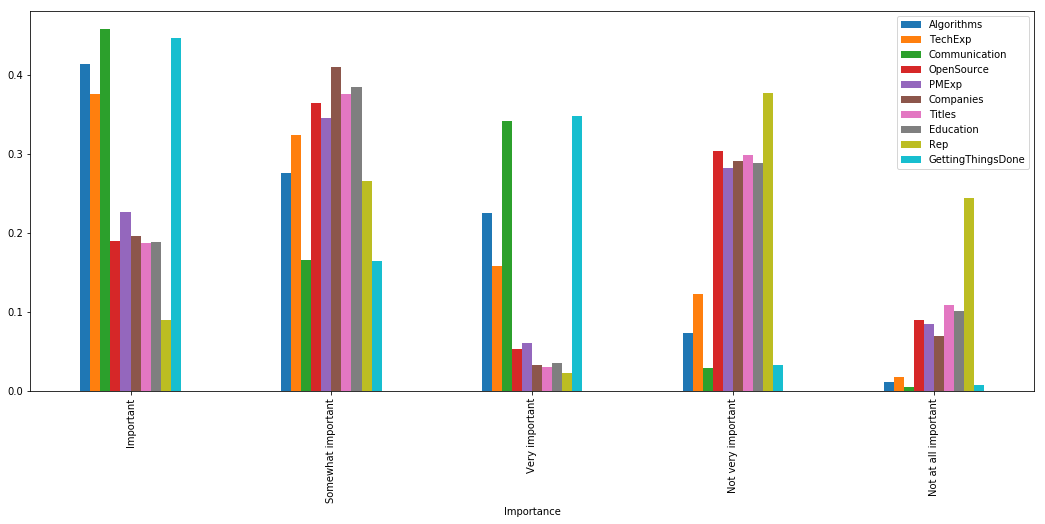

In [32]:
df_hiring.plot(figsize=(18,7),kind="bar")

### Question3: What is the percentage of career satisfaction of those who said that education is important in their career success compared to those who mentioned not important? Which group has the highest average career satisfaction ?

In [33]:
h.get_description('EducationImportant',schema)

'Overall, how important has your formal schooling and education been to your career success?'

In [34]:
h.get_description('CareerSatisfaction',schema)

'Career satisfaction rating'

In [35]:
df.CareerSatisfaction.value_counts()

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

In [36]:
Edu_career = df.groupby('EducationImportant').mean()['CareerSatisfaction'].sort_values().reset_index().set_index('EducationImportant')

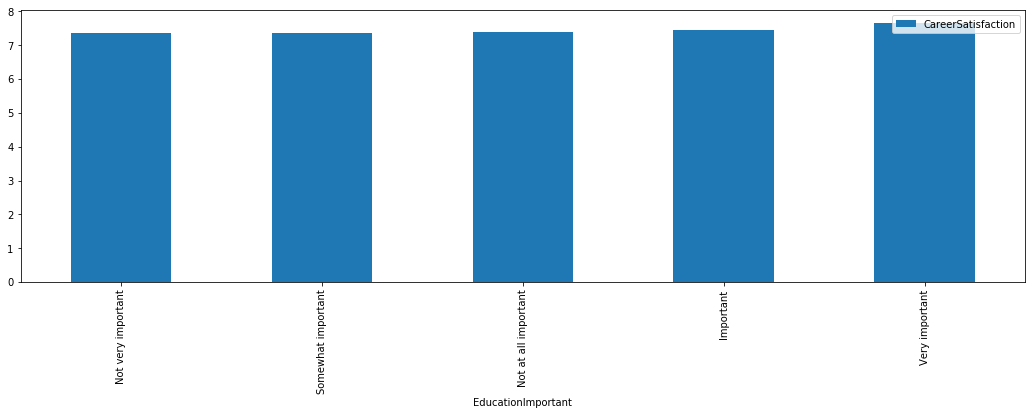

In [37]:
Edu_career.plot(figsize=(18,5),kind="bar")

In [38]:
def career_satisfaction(career_satisfation_int):
    '''
    INPUT
        career_satisfation_int - an integer values of career_satisfaction column
    
    OUTPUT
        return 1 if the rating is larger than 5
        return 0 otherwise
    
    '''
    if career_satisfation_int > 5:
        return 1
    else:
        return 0

In [39]:
df['HighRateSatisfaction'] = df["CareerSatisfaction"].apply(career_satisfaction)

In [40]:
career_sat_1 = df[df['HighRateSatisfaction'] == 1] # Subset df to only those with career satisfaction more than 5
career_sat_0 = df[df['HighRateSatisfaction'] == 0] # Subset df to only those with career satisfaction less than 5

In [41]:
career_sat_1_perc = clean_and_plot(career_sat_1, 'Higher Rate', plot=False)
career_sat_0_perc = clean_and_plot(career_sat_0, 'Lower Rate', plot=False)

comp_df = pd.merge(career_sat_1_perc, career_sat_0_perc, left_index=True, right_index=True)
comp_df.columns = ['career_sat_1_perc', 'career_sat_0_perc']
comp_df['Diff_HighRateSatisfaction_Vals'] = comp_df['career_sat_1_perc'] - comp_df['career_sat_0_perc']
comp_df.style.bar(subset=['Diff_HighRateSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,career_sat_1_perc,career_sat_0_perc,Diff_HighRateSatisfaction_Vals
Importance,,,
Somewhat important,0.269629,0.266951,0.00267807
Important,0.252783,0.238782,0.0140015
Not very important,0.205201,0.206027,-0.000825401
Very important,0.16161,0.142483,0.0191269
Not at all important,0.110777,0.145758,-0.034981


### Question 4: Through the answers of the developers, what is the most used method in their educational process other than formal education?

In [42]:
h.get_description('EducationTypes',schema)

'Outside of your formal schooling and education, which of the following have you done?'

In [43]:
df.EducationImportant.value_counts()

Somewhat important      6289
Important               5861
Not very important      4795
Very important          3716
Not at all important    2694
Name: EducationImportant, dtype: int64

In [44]:
possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 'Coding competition', 'Part-time/evening course', 'Industry certification', 'Bootcamp']
educationType_df = df.EducationTypes.value_counts().reset_index()
educationType_df.rename(columns={'index': 'method', 'EducationTypes': 'count'}, inplace=True)
educationType_count_df = h.total_count(educationType_df, 'method', 'count', possible_vals)
educationType_count_df.set_index('method', inplace=True)

In [45]:
educationType_count_df

,count
method,
Self-taught,27330
Online course,13792
On-the-job training,12508
Open source contributions,11225
Hackathon,7150
Coding competition,6683
Part-time/evening course,4654
Industry certification,4472
Bootcamp,2727


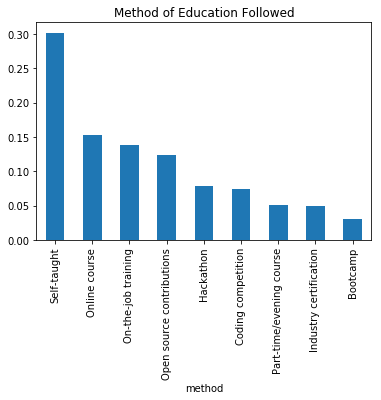

In [46]:
(educationType_count_df/educationType_count_df.sum()).plot(kind='bar', legend=None);
plt.title('Method of Education Followed');
plt.show()